In [119]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math

In [120]:
# List of 50 stocks
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "BRK-B", "JPM", "V",
    "UNH", "JNJ", "XOM", "PG", "HD", "MA", "CVX", "ABBV", "PEP", "LLY",
    "KO", "MRK", "AVGO", "COST", "MCD", "TMO", "DIS", "CSCO", "ACN", "AMD",
    "CMCSA", "ADBE", "NFLX", "PFE", "DHR", "NKE", "TXN", "LIN", "UNP", "INTC",
    "HON", "IBM", "PM", "CAT", "GE", "NOW", "GS", "BLK", "AXP", "DE"
]

# Download historical data for the past 1 month
# Data is a multi-indexed dataframe with ohlc on the first row and the stock ticker on the second row.
data = yf.download(tickers, period="1y", interval="1d")

[***                    6%%                      ]  3 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[*******               14%%                      ]  7 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[***********           22%%                      ]  11 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[*************         28%%                      ]  14 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[****************      34%%                      ]  17 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[********************* 44%%                      ]  22 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************50%%                      ]  25 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************54%%                      ]  27 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************62%%****                  ]  31 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************70%%********              ]  35 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************72%%*********             ]  36 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************80%%************          ]  40 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************86%%***************       ]  43 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************88%%****************      ]  44 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************92%%******************    ]  46 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************96%%********************  ]  48 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  50 of 50 completed


/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [121]:
data.head()

Adj Close                                                  \
                  AAPL        ABBV         ACN        ADBE         AMD   
Date                                                                     
2024-02-06  188.377136  167.199326  360.240723  607.140015  167.880005   
2024-02-07  188.486618  168.858841  362.166901  615.849976  170.940002   
2024-02-08  187.401917  168.646591  363.974518  615.859985  169.350006   
2024-02-09  188.169144  167.961563  367.125519  627.210022  172.479996   
2024-02-12  186.475266  166.987061  362.937347  611.840027  171.910004   

                                                                        ...  \
                  AMZN        AVGO         AXP         BLK       BRK-B  ...   
Date                                                                    ...   
2024-02-06  169.149994  120.640060  203.395020  769.602356  393.739990  ...   
2024-02-07  170.529999  124.035332  206.787430  776.165710  397.660004  ...   
2024-02-08  169.839996  125.781807  208.894073  774.700623  397.489990  ...   
2024-02-09  174.449997  126.638268  210.140259  778.617126  398.359985  ...   
2024-02-12  172.339996  124.818787  209.932541  783.060974  397.709991  ...   

              Volume                                                          \
                 PFE       PG       PM      TMO       TSLA      TXN      UNH   
Date                                                                           
2024-02-06  56958700  6185400  5160100  1328100  122676000  4139800  2745400   
2024-02-07  36843000  7209300  4694300  1451400  111535200  4627900  4109100   
2024-02-08  29048400  6121600  9260300  1549300   83034000  3487700  3343000   
2024-02-09  29062700  5978000  4966300  1280800   84476300  3919500  2715400   
2024-02-12  30323700  5482000  4022300  1073000   95498600  3853000  3194000   

                                        
                UNP        V       XOM  
Date                                    
2024-02-06  2357300  4400000  13347900  
2024-02-07  2337200  4785900  13826800  
2024-02-08  1871500  5833400  19636900  
2024-02-09  2012500  4618300  20410500  
2024-02-12  2259600  3676200  18173100  

[5 rows x 300 columns]

In [122]:
# summary statistics of 'data' dataframe
data.describe()

Adj Close                                                              \
             AAPL        ABBV         ACN        ADBE         AMD        AMZN   
count  251.000000  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   211.196929  175.024566  338.468829  508.880198  153.901315  191.534183   
std     26.024042   12.262362   27.986934   46.337057   20.690940   18.984276   
min    164.405121  150.744324  279.392517  405.920013  112.010002  161.020004   
25%    186.159470  165.649307  314.192581  477.339996  139.345001  178.625000   
50%    221.476334  172.891968  343.899994  507.220001  155.279999  185.990005   
75%    229.143867  186.953659  361.059998  546.709991  166.345001  199.419998   
max    259.019989  201.965424  398.250000  627.210022  211.380005  242.059998   

                                                        ...        Volume  \
             AVGO         AXP          BLK       BRK-B  ...           PFE   
count  251.000000  251.000000   251.000000  251.000000  ...  2.510000e+02   
mean   162.209887  254.261183   879.298867  435.231674  ...  3.804069e+07   
std     32.785322   32.418930   106.726319   26.000386  ...  1.583885e+07   
min    119.376144  203.395020   734.400391  393.739990  ...  1.518010e+07   
25%    133.686897  228.812790   782.989563  409.145004  ...  2.854580e+07   
50%    160.431076  244.673889   846.968933  438.309998  ...  3.503000e+07   
75%    174.492470  278.839417   991.216583  458.645004  ...  4.390870e+07   
max    249.331955  325.869995  1075.500000  483.079987  ...  1.310744e+08   

                                                                             \
                 PG            PM           TMO          TSLA           TXN   
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02   
mean   6.588445e+06  5.345821e+06  1.542591e+06  9.138032e+07  5.549583e+06   
std    2.751891e+06  2.193225e+06  6.695166e+05  3.308226e+07  2.339184e+06   
min    2.460800e+06  1.647800e+06  4.887000e+05  3.716760e+07  1.950900e+06   
25%    5.102800e+06  3.954900e+06  1.119400e+06  6.807345e+07  4.133600e+06   
50%    6.056500e+06  4.899800e+06  1.389200e+06  8.356820e+07  5.041200e+06   
75%    7.208700e+06  5.949450e+06  1.789550e+06  1.055352e+08  6.213250e+06   
max    2.864750e+07  1.837440e+07  6.150900e+06  2.438697e+08  1.907880e+07   

                                                               
                UNH           UNP             V           XOM  
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  
mean   4.099955e+06  2.389020e+06  6.937997e+06  1.588678e+07  
std    2.478969e+06  8.344359e+05  3.698231e+06  5.391629e+06  
min    1.581900e+06  6.690000e+05  2.684100e+06  7.732900e+06  
25%    2.676200e+06  1.822100e+06  4.836800e+06  1.259525e+07  
50%    3.332800e+06  2.252300e+06  5.969900e+06  1.483570e+07  
75%    4.556550e+06  2.792050e+06  7.985500e+06  1.765065e+07  
max    2.273420e+07  6.802600e+06  2.781090e+07  5.222060e+07  

[8 rows x 300 columns]

In [123]:
# Check for missing values and sort in descending format to capture values faster.
data.isnull().sum().sort_values(ascending=False)

Volume     XOM     0
Adj Close  AAPL    0
           ABBV    0
           ACN     0
           ADBE    0
                  ..
           DHR     0
           DE      0
           CVX     0
           CSCO    0
           COST    0
Length: 300, dtype: int64

In [124]:
''' 
returns stores the percentage returns of each of the assets on a daily basis
Alternatively you can use 
returns = df.loc["adj_close"].pct_change() * 100
'''

returns = ((data["Adj Close"] - data["Adj Close"].shift(1)) / data["Adj Close"].shift(1)) * 100
print(returns)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-06       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-07  0.058118  0.992537  0.534692  1.434589  1.822729  0.815847   
2024-02-08 -0.575479 -0.125697  0.499112  0.001625 -0.930149 -0.404622   
2024-02-09  0.409402 -0.406191  0.865720  1.842957  1.848237  2.714320   
2024-02-12 -0.900189 -0.580194 -1.140801 -2.450534 -0.330469 -1.209516   
...              ...       ...       ...       ...       ...       ...   
2025-01-30 -0.739474  0.222526  1.690611  0.978085  1.286751 -1.025017   
2025-01-31 -0.669219  4.696840  1.103089 -1.917038 -2.448262  1.295599   
2025-02-03 -3.385596  3.393152  0.067536  0.262886 -1.448901 -0.109388   
2025-02-04  2.100789 -0.099928  1.664028  0.371638  4.576882  1.954342   
2025-02-05 -0.141753  0.947619  1.692969 -0.590602 -6.267781 -2.433281   

                AVGO       AXP       

In [125]:
log_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
print(log_returns)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-06       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-07  0.000581  0.009876  0.005333  0.014244  0.018063  0.008125   
2024-02-08 -0.005771 -0.001258  0.004979  0.000016 -0.009345 -0.004054   
2024-02-09  0.004086 -0.004070  0.008620  0.018262  0.018314  0.026781   
2024-02-12 -0.009043 -0.005819 -0.011474 -0.024811 -0.003310 -0.012169   
...              ...       ...       ...       ...       ...       ...   
2025-01-30 -0.007422  0.002223  0.016765  0.009733  0.012785 -0.010303   
2025-01-31 -0.006715  0.045899  0.010970 -0.019357 -0.024787  0.012873   
2025-02-03 -0.034442  0.033369  0.000675  0.002625 -0.014595 -0.001094   
2025-02-04  0.020790 -0.001000  0.016503  0.003709  0.044752  0.019355   
2025-02-05 -0.001419  0.009432  0.016788 -0.005924 -0.064728 -0.024634   

                AVGO       AXP       

In [126]:
# Select 'AAPL' stock data and extract the 'Close' column
close_prices = data['Close']

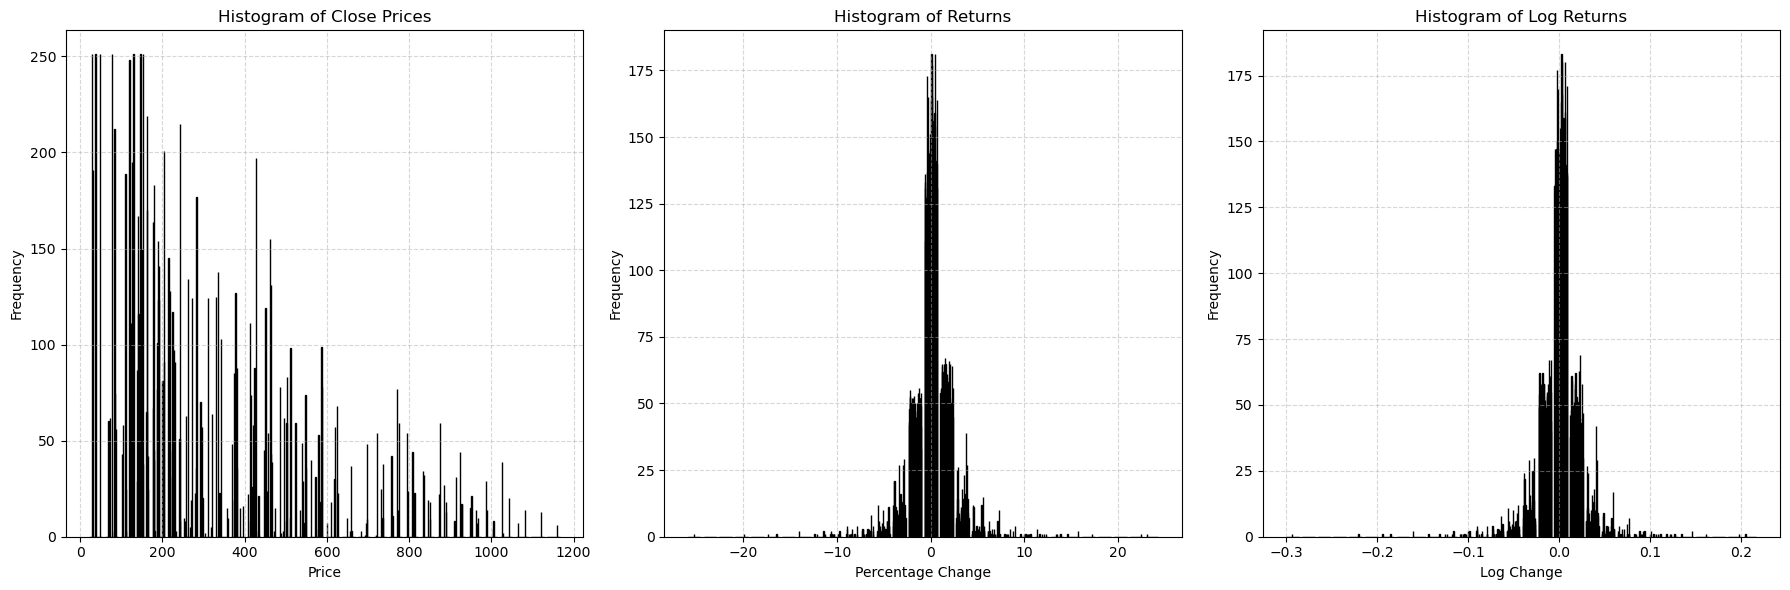

In [127]:
# Create a figure and two subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot (left side)
axes[0].hist(close_prices, bins=30, edgecolor='black')
axes[0].set_title('Histogram of Close Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Second subplot (right side)
axes[1].hist(returns, bins=30, edgecolor='black')
axes[1].set_title('Histogram of Returns')
axes[1].set_xlabel('Percentage Change')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Third subplot (right side)
axes[2].hist(log_returns, bins=30, edgecolor='black')
axes[2].set_title('Histogram of Log Returns')
axes[2].set_xlabel('Log Change')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping of labels
plt.show()

The histograms of adjusted closing prices and percentage returns reveal distinct statistical characteristics of the dataset.

1. Adjusted Closing Prices: The histogram exhibits a right-skewed (positively skewed) distribution, indicating that while most stock prices cluster at lower values, a few stocks have significantly higher prices. This skewness suggests a long right tail, which is characteristic of financial data where a few large-cap stocks (e.g., AMZN, BRK-B) have disproportionately high prices compared to smaller-cap stocks.

2. Percentage Returns: The histogram of daily percentage returns appears approximately normally distributed, with most values concentrated around zero. This suggests that stock returns exhibit symmetry, with gains and losses distributed fairly evenly around the mean. This aligns with the fundamental assumption in many financial models, such as the log-normal distribution of prices and the normality of short-term returns under the Efficient Market Hypothesis.

# Statistical Interpretation:
The right-skewness in prices implies that using raw price values in models can lead to misleading conclusions due to the large variation in scale across stocks.
The near-normal distribution of percentage returns suggests that using returns instead of prices provides a stationary and scale-independent measure of stock performance, making it more suitable for statistical modeling and risk analysis.

---

# Creating New Features
- Daily log returns
- Daily risk (standard deviation)

In [128]:
# Assign back to the original dataframe under a new column level
log_returns.columns = pd.MultiIndex.from_product([['Log Returns'], log_returns.columns])  # Add new top-level index

In [129]:
# Merge with the original dataframe
data = data.join(log_returns)

In [130]:
data['Log Returns'].head()

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-07,0.000581,0.009876,0.005333,0.014244,0.018063,0.008125,0.027755,0.016541,0.008492,0.009907,...,0.002179,0.001006,-0.002403,-0.014327,0.013309,0.002523,0.016931,-0.002845,0.009458,-0.000293
2024-02-08,-0.005771,-0.001258,0.004979,0.000016,-0.009345,-0.004054,0.013982,0.010136,-0.001889,-0.000428,...,0.000363,-0.003021,-0.026934,-0.002574,0.010500,0.009029,0.001347,-0.001366,-0.011142,0.016975
2024-02-09,0.004086,-0.004070,0.008620,0.018262,0.018314,0.026781,0.006786,0.005948,0.005043,0.002186,...,-0.000363,-0.007720,0.001235,-0.000254,0.020934,0.013577,-0.003602,0.002529,0.002354,-0.021387
2024-02-12,-0.009043,-0.005819,-0.011474,-0.024811,-0.003310,-0.012169,-0.014472,-0.000989,0.005691,-0.001633,...,0.003622,-0.001971,0.009826,-0.007088,-0.028506,-0.008161,-0.001120,-0.008252,-0.004932,0.013663


In [131]:
#Calculate the standard deviation of the entire dataset
# std_dev_entire = data['Log Returns'].std().sort_values(ascending=False)
# std_dev_entire.plot(kind='bar', figsize=(12,6))
# plt.title('Population Standard Deviation of Assets')
# plt.xlabel('Assets')
# plt.ylabel('Standard Deviation')
# plt.show()

In [132]:
rolling_std_dev = data['Log Returns'].rolling(window=5).std()
print(rolling_std_dev)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-06       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-07       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-08       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-09       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-12       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2025-01-30  0.020179  0.018959  0.015834  0.006882  0.035615  0.008205   
2025-01-31  0.020759  0.025123  0.014421  0.012436  0.036256  0.010033   
2025-02-03  0.025411  0.024141  0.011239  0.011997  0.021160  0.010153   
2025-02-04  0.020202  0.021523  0.011718  0.011067  0.028862  0.012403   
2025-02-05  0.019686  0.020603  0.006976  0.011271  0.041078  0.017689   

                AVGO       AXP       

In [133]:
# Assign back to the original dataframe under a new column level
rolling_std_dev.columns = pd.MultiIndex.from_product([['Daily Risk'], rolling_std_dev.columns])  # Add new top-level index

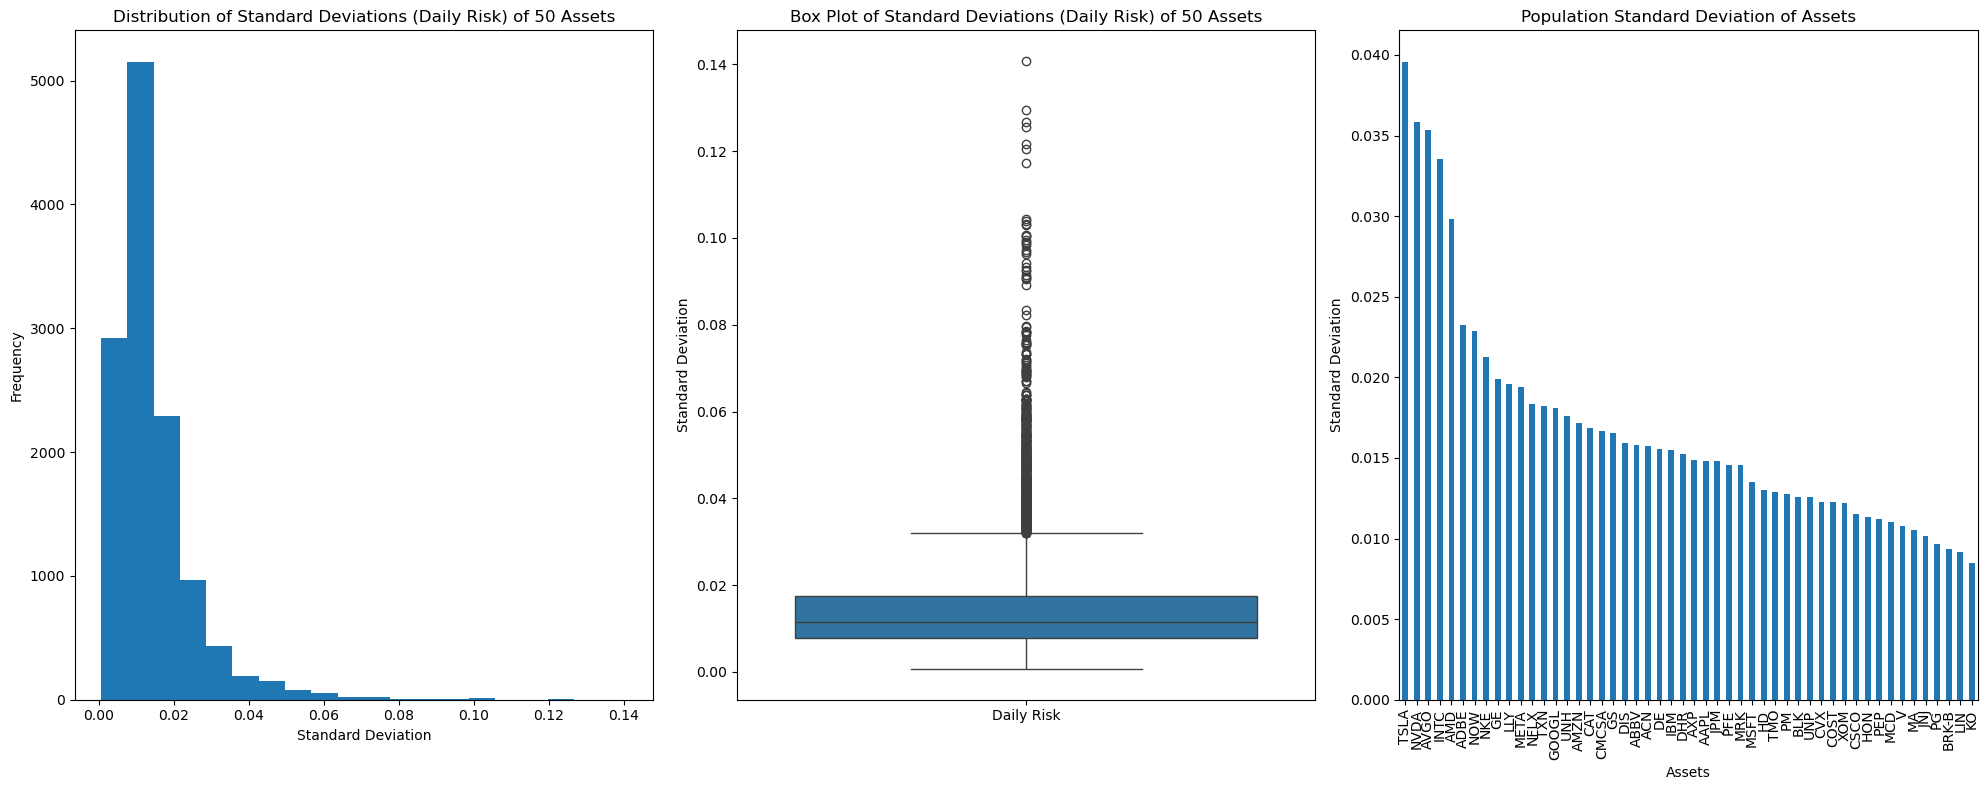

In [134]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
std_dev_entire = data['Log Returns'].std().sort_values(ascending=False)

axes[0].hist(rolling_std_dev.values.flatten(), bins=20)
axes[0].set_title('Distribution of Standard Deviations (Daily Risk) of 50 Assets')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')

sns.boxplot(rolling_std_dev, ax=axes[1])
axes[1].set_title('Box Plot of Standard Deviations (Daily Risk) of 50 Assets')
axes[1].set_ylabel('Standard Deviation')

std_dev_entire.plot(kind='bar', ax=axes[2])
axes[2].set_title('Population Standard Deviation of Assets')
axes[2].set_xlabel('Assets')
axes[2].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

# Intuition
1. Most assets have low daily risk (standard deviation): The majority of the assets have relatively small variations in price, and thus their standard deviations are lower.

2. A few assets have high daily risk (standard deviation): There are some assets with much higher volatility, but these are fewer in number. These assets' returns deviate much more from their mean, which shows up as the right tail of the histogram.

The skewness in volatility should be accounted for during random portfolio generation. If randomly sampled from assets without considering skewness, you might create portfolios that are riskier than expected.
Give lower-risk assets a higher probability of selection, Instead of equal probability, adjust selection based on risk—low-volatility assets get chosen more often.

In [135]:
# Merge with the original dataframe
data = data.join(rolling_std_dev)

In [136]:
data['Daily Risk'].head(10)

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-13,0.006487,0.006147,0.010172,0.018746,0.012957,0.018821,0.017493,0.011051,0.015820,0.006290,...,0.012048,0.003321,0.013800,0.006752,0.022468,0.016034,0.008308,0.004417,0.007909,0.015867
2024-02-14,0.005895,0.004837,0.014656,0.017115,0.020714,0.019630,0.012559,0.008789,0.015978,0.006243,...,0.012492,0.002226,0.014005,0.012191,0.024875,0.016402,0.001866,0.010675,0.007014,0.016029
2024-02-15,0.006119,0.007519,0.014582,0.019039,0.021068,0.019838,0.010395,0.008258,0.017980,0.007971,...,0.014932,0.006436,0.006840,0.012200,0.036710,0.018146,0.004295,0.010611,0.006270,0.019571
2024-02-16,0.003850,0.006730,0.014254,0.030118,0.022725,0.013180,0.010736,0.007829,0.018013,0.008079,...,0.015063,0.005862,0.007663,0.012196,0.036648,0.016640,0.003699,0.013046,0.008435,0.015197


In [137]:
data.isnull().sum().sort_values(ascending=False)

Daily Risk  DIS      5
            DHR      5
            DE       5
            CVX      5
            CSCO     5
                    ..
High        COST     0
            CMCSA    0
            CAT      0
            BRK-B    0
            BLK      0
Length: 400, dtype: int64